# perform outlier handle if it is there in one ipynb all the method(10-12)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [19]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data5/Visadataset.csv")
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [20]:
data.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

# Highlighting the outliers
An outlier is a data point which is significantly different from the remaining data. 

we will identify outliers using boxplots and the inter-quantile range proximity rule.

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

IQR = 75th quantile - 25th quantile

Text(0.5, 1.0, 'Boxplot')

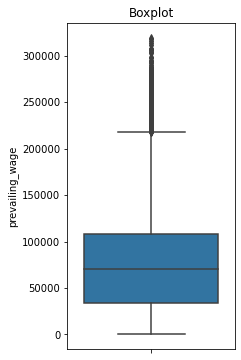

In [5]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=data['prevailing_wage'])
plt.title('Boxplot')

In [6]:
def outlier(df,variable):
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    iqr=q3-q1
    up_limit=q3+1.5*iqr
    low_limit=q1-1.5*iqr
    return up_limit, low_limit

In [8]:
### calculate the number of numerical columns
num_col=[i for i in data.columns if data[i].dtypes!='O']
## converting to a dataframe
data_num=data[num_col] 

In [9]:
##Calling the outlier function for all variables
for i in data_num.columns:
    up_limit, low_limit=outlier(data_num, i)
    print (up_limit, low_limit)

7227.0 -2701.0
2048.5 1932.5
218315.56125000003 -76564.56875000002


In [10]:
##checking the outlier for an individual variable
up_limit, low_limit=outlier(data_num, 'prevailing_wage')
print(up_limit, low_limit)

218315.56125000003 -76564.56875000002


In [11]:
# let's flag the outliers in the data set
outliers = np.where(data['prevailing_wage'] > up_limit, True,
                    np.where(data['prevailing_wage'] < low_limit, True, False))

In [12]:
##Calculate the total number of outliers
outliers.sum()

427

In [13]:
# let's print 20 of them
outliers_df = data.loc[outliers, 'prevailing_wage']
outliers_df.head(20)

14      220081.73
34      225569.73
130     247393.01
216     269321.68
221     219529.62
325     232227.33
328     238691.32
348     220448.17
427     230750.48
457     235339.91
493     232680.65
514     256261.78
551     262189.00
622     250510.67
669     218554.78
674     256205.38
819     221944.22
942     229950.70
1038    222628.84
1048    229819.69
Name: prevailing_wage, dtype: float64

In [14]:
## to remove the outliers we can use
data.loc[~outliers, 'prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

In [15]:
## or replace the outlier with the threshold value
def replace_with_threshold(data, numeric_col):
    for variable in numeric_col:
        up_limit, low_limit=outlier(data_num, variable)
        data.loc[data[variable]<low_limit, variable]=low_limit
        data.loc[data[variable]>up_limit, variable]=up_limit

In [16]:
replace_with_threshold(data_num, data_num.columns)

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
data_num

,no_of_employees,yr_of_estab,prevailing_wage
0,7227,2007.0,592.20290
1,2412,2002.0,83425.65000
2,7227,2008.0,122996.86000
3,98,1932.5,83434.03000
4,1082,2005.0,149907.39000
...,...,...,...
25475,2601,2008.0,77092.57000
25476,3274,2006.0,218315.56125
25477,1121,1932.5,146298.85000
25478,1918,1932.5,86154.77000
